<font size = 8 color ='336EFF'>Perceptron by Hand</font>

---
### Héctor Hibran Tapia Fernández - A01661114
---

Rosenblatt (1958) defined a Perceptron as a system that learns using labeled examples (i.e., supervised learning) of feature vectors (or raw pixel intensities), mapping these inputs to their corresponding output class labels.

In its simplest form, a Perceptron contains N input nodes, one for each entry in the input row of the design matrix, followed by only one layer in the network with just a single node in that layer.

There exist connections and their corresponding weights $w_1, w_2, …, w_i$ from the input $x_i$’s to the single output node in the network. This node takes the weighted sum of inputs and applies a step function to determine the output class label. The Perceptron outputs either a *0* or a *1* — 0 for class #1 and 1 for class #2; thus, in its original form, **the Perceptron is simply a binary, two-class classifier.**

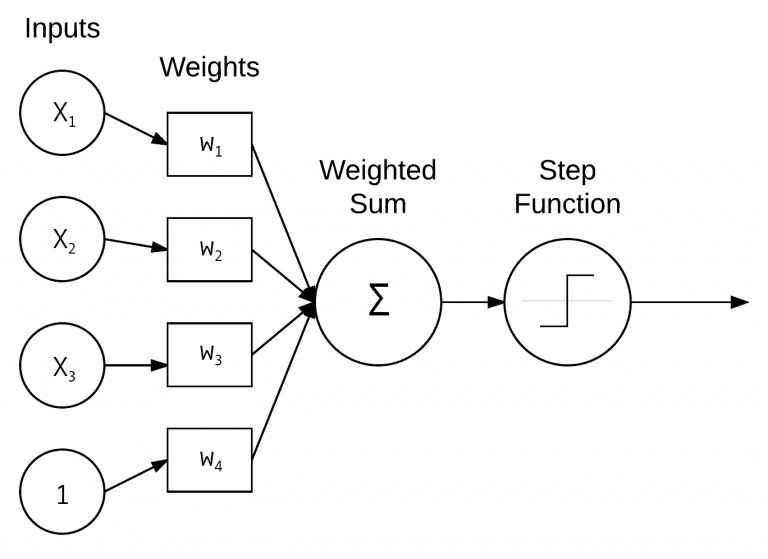

1. Initialize our weight vector w with small random values

2. Until Perceptron converges:

 (a) Loop over each feature vector $x_j$ and true class label $d_i$ in our training set D \
 (b) Take x and pass it through the network, calculating the output value: $y_j = f(w(t) · x_j)$ \
 (c) Update the weights $w: w_i(t +1) = w_i(t) + α (d_j −y_j)x_{j,i}$ for all features 0 <= i <= n

Training a Perceptron is a fairly straightforward operation. Our goal is to obtain a set of weights w that accurately classifies each instance in our training set. In order to train our Perceptron, we iteratively feed the network with our training data multiple times. Each time the network has seen the full set of training data, we say an epoch has passed. It normally takes many epochs until a weight vector w can be learned to linearly separate our two classes of data.

The pseudocode for the Perceptron training algorithm can be found here: https://pyimagesearch.com/2021/05/06/implementing-the-perceptron-neural-network-with-python/


### Apply the perceptron algorithm using bias to the Logical AND, OR and for XOR.  



---







Bitwise operators and associated bitwise datasets accept two input bits and produce a final output bit after applying the operation. Given two input bits, each potentially taking on a value of 0 or 1, there are four possible combinations of these two bits.

The next table  provides the possible input and output values for AND, OR, and XOR:

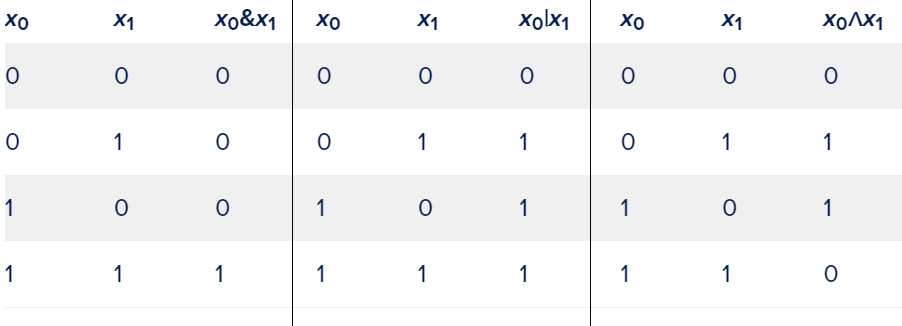

As we can see on the left, a logical AND is true if and only if both input values are 1. If either of the input values is 0, the AND returns 0. Thus, there is only one combination, x$_0$ = 1 and $x_1$ = 1 when the output of AND is true.

In the middle, we have the OR operation which is true when at least one of the input values is 1. Thus, there are three possible combinations of the two bits $x_0$ and $x_1$ that produce a value of y = 1.

Finally, the right displays the XOR operation which is true if and only if one if the inputs is 1 but not both. While OR had three possible situations where y = 1, XOR only has two.

We often use these simple “bitwise datasets” to test and debug machine learning algorithms. If we plot and visualize the AND, OR, and XOR values (with red circles being zero outputs and blue stars one outputs), we’ll notice an interesting pattern:

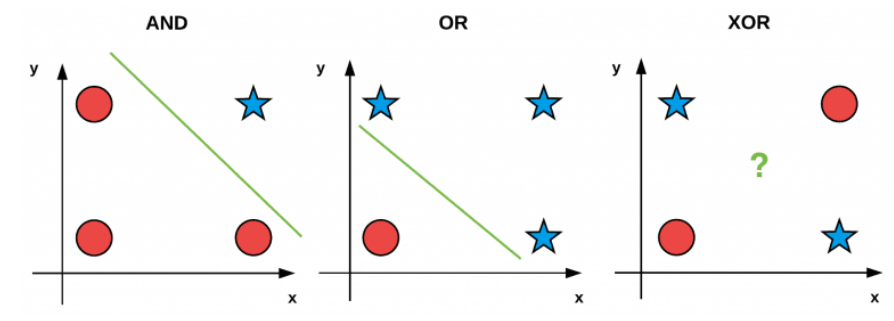

Both AND and OR are linearly separable — we can clearly draw a line that separates the 0 and 1 classes — the same is not true for XOR. XOR is, therefore, an example of a nonlinearly separable dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # Creamos un array con los valores de entrada, en este caso los valores de entrada son las 4 posibles combinaciones de 0 y 1

and_output = np.array([0, 0, 0, 1]) # Creamos un array con los valores de salida de la puerta AND
or_output = np.array([0, 1, 1, 1]) # Creamos un array con los valores de salida de la puerta OR
xor_output = np.array([0, 1, 1, 0]) # Creamos un array con los valores de salida de la puerta XOR

### Do only 3 Epochs (4 iterations each epoch) and see if the algorithm converges.



---



You can either select your own initial weights and bias, and learning rate.
You can also use: w0 = b = -.8;  w1 = 0.5;  w2 = 0.5; alpha = 0.2




In [3]:
def perceptron(X, y, weights, bias, learning_rate, epochs): # Definimos la función del perceptrón, que recibe como parámetros los valores de entrada, los valores de salida, los pesos, el bias, la tasa de aprendizaje y el número de épocas
    misclassified = [] # Creamos una lista para almacenar el número de valores mal clasificados en cada época
    for epoch in range(epochs):  # Iteramos por cada época
        print(f"Epoch {epoch + 1}") # Imprimimos el número de época
        misclassified_count = 0 # Inicializamos el contador de valores mal clasificados a 0
        for i in range(len(X)):  # Iteramos por cada valor de entrada
            weighted_sum = np.dot(X[i], weights) + bias # Calculamos la suma ponderada, que es el producto escalar de los valores de entrada y los pesos, más el bias
            output = 1 if weighted_sum > 0 else 0 # Calculamos la salida de la neurona, que es 1 si la suma ponderada es mayor que 0, y 0 en caso contrario
            error = y[i] - output # Calculamos el error, que es la diferencia entre el valor de salida real y el valor de salida de la neurona
            if error != 0: # Si el error es distinto de 0, es que el valor está mal clasificado
                misclassified_count += 1 # Aumentamos el contador de valores mal clasificados
            weights += learning_rate * error * X[i] # Actualizamos los pesos, que son los pesos anteriores más la tasa de aprendizaje por el error por los valores de entrada
            bias += learning_rate * error # Actualizamos el bias, que es el bias anterior más la tasa de aprendizaje por el error
            print(f"Iteration {i + 1}, weights: {weights}, bias: {bias}") # Imprimimos los valores de los pesos y el bias en cada iteración
        misclassified.append(misclassified_count) # Añadimos el número de valores mal clasificados a la lista
    return weights, bias, misclassified # Devolvemos los pesos, el bias y la lista de valores mal clasificados

In [4]:
w0, w1, w2 = -0.8, 0.5, 0.5 # Inicializamos los pesos de la neuronas
bias = -0.8 # Inicializamos el bias de la neurona
learning_rate = 0.2 # Inicializamos la tasa de aprendizaje

## **A property of the Perceptron is that if the dataset is linearly separable, then the algorithm is guaranteed to converge at some point!**

Epoch 1
Iteration 1, weights: [0.5 0.5], bias: -0.8
Iteration 2, weights: [0.5 0.5], bias: -0.8
Iteration 3, weights: [0.5 0.5], bias: -0.8
Iteration 4, weights: [0.5 0.5], bias: -0.8
Epoch 2
Iteration 1, weights: [0.5 0.5], bias: -0.8
Iteration 2, weights: [0.5 0.5], bias: -0.8
Iteration 3, weights: [0.5 0.5], bias: -0.8
Iteration 4, weights: [0.5 0.5], bias: -0.8
Epoch 3
Iteration 1, weights: [0.5 0.5], bias: -0.8
Iteration 2, weights: [0.5 0.5], bias: -0.8
Iteration 3, weights: [0.5 0.5], bias: -0.8
Iteration 4, weights: [0.5 0.5], bias: -0.8


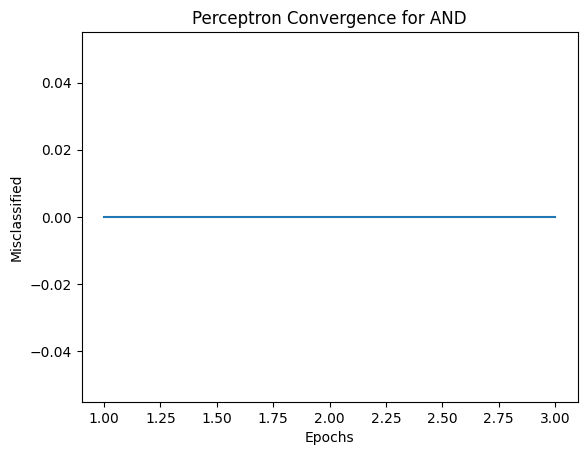

In [5]:
weights_and, bias_and, misclassified_and = perceptron(inputs, and_output, np.array([w1, w2]), bias, learning_rate, 3) # Ejecutamos el perceptrón para la puerta AND

epochs = np.arange(1, len(misclassified_and) + 1)  # Creamos un array con el número de épocas
plt.plot(epochs, misclassified_and) # Dibujamos la gráfica del número de valores mal clasificados por época
plt.xlabel('Epochs') 
plt.ylabel('Misclassified')
plt.title('Perceptron Convergence for AND')
plt.show()

## Converge, lo que significa que es linealmente separable.

Epoch 1
Iteration 1, weights: [0.5 0.5], bias: -0.8
Iteration 2, weights: [0.5 0.7], bias: -0.6000000000000001
Iteration 3, weights: [0.7 0.7], bias: -0.4000000000000001
Iteration 4, weights: [0.7 0.7], bias: -0.4000000000000001
Epoch 2
Iteration 1, weights: [0.7 0.7], bias: -0.4000000000000001
Iteration 2, weights: [0.7 0.7], bias: -0.4000000000000001
Iteration 3, weights: [0.7 0.7], bias: -0.4000000000000001
Iteration 4, weights: [0.7 0.7], bias: -0.4000000000000001
Epoch 3
Iteration 1, weights: [0.7 0.7], bias: -0.4000000000000001
Iteration 2, weights: [0.7 0.7], bias: -0.4000000000000001
Iteration 3, weights: [0.7 0.7], bias: -0.4000000000000001
Iteration 4, weights: [0.7 0.7], bias: -0.4000000000000001


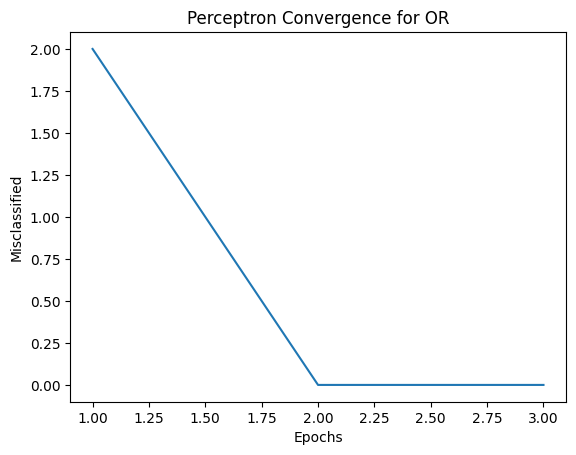

In [6]:
weights_or, bias_or, misclassified_or = perceptron(inputs, or_output, np.array([w1, w2]), bias, learning_rate, 3)

epochs = np.arange(1, len(misclassified_or) + 1)
plt.plot(epochs, misclassified_or)
plt.xlabel('Epochs')
plt.ylabel('Misclassified')
plt.title('Perceptron Convergence for OR')
plt.show()

## Converge (en 2), lo que significa que es linealmente separable.

Epoch 1
Iteration 1, weights: [0.5 0.5], bias: -0.8
Iteration 2, weights: [0.5 0.7], bias: -0.6000000000000001
Iteration 3, weights: [0.7 0.7], bias: -0.4000000000000001
Iteration 4, weights: [0.5 0.5], bias: -0.6000000000000001
Epoch 2
Iteration 1, weights: [0.5 0.5], bias: -0.6000000000000001
Iteration 2, weights: [0.5 0.7], bias: -0.4000000000000001
Iteration 3, weights: [0.5 0.7], bias: -0.4000000000000001
Iteration 4, weights: [0.3 0.5], bias: -0.6000000000000001
Epoch 3
Iteration 1, weights: [0.3 0.5], bias: -0.6000000000000001
Iteration 2, weights: [0.3 0.7], bias: -0.4000000000000001
Iteration 3, weights: [0.5 0.7], bias: -0.20000000000000007
Iteration 4, weights: [0.3 0.5], bias: -0.4000000000000001


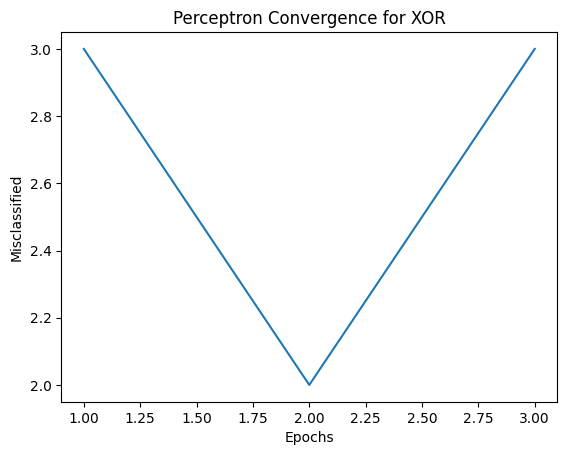

In [7]:
weights_xor, bias_xor, misclassified_xor = perceptron(inputs, xor_output, np.array([w1, w2]), bias, learning_rate, 3)

epochs = np.arange(1, len(misclassified_xor) + 1)
plt.plot(epochs, misclassified_xor)
plt.xlabel('Epochs')
plt.ylabel('Misclassified')
plt.title('Perceptron Convergence for XOR')
plt.show()

## No converge, lo que significa que es no linealmente separable.

Referencias: https://towardsdatascience.com/perceptron-and-its-implementation-in-python-f87d6c7aa428
